# Zomato Bangalore Restaurants EDA 🍽️

## 📄 Introduction
This project explores the Zomato Bangalore dataset to understand customer preferences, restaurant types, rating distributions, and popular cuisines. The goal is to extract actionable insights using Pandas, Matplotlib, and Seaborn.

📁 **Dataset Source**: [Zomato Bangalore Dataset on Kaggle](https://www.kaggle.com/datasets/srinivasu558/zomato-bangalore-restaurants)


### 📥 Loading the Dataset
Let’s load the dataset and take a first look at its structure using Pandas.


In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#loading dataset
df=pd.read_csv("zomato.csv")

### 🔍 Basic Information
We’ll begin by checking the shape, data types, and some top rows of the dataset to understand the overall structure.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          5000 non-null   object
 1   address                      5000 non-null   object
 2   name                         5000 non-null   object
 3   online_order                 5000 non-null   object
 4   book_table                   5000 non-null   object
 5   rate                         4257 non-null   object
 6   votes                        5000 non-null   int64 
 7   phone                        4874 non-null   object
 8   location                     4997 non-null   object
 9   rest_type                    4976 non-null   object
 10  dish_liked                   2264 non-null   object
 11  cuisines                     4994 non-null   object
 12  approx_cost(for two people)  4958 non-null   object
 13  reviews_list                 5000

In [4]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/kalingas-btm?...,"399, 16th Main, N.S Palya, BTM, Bangalore",Kalingas,Yes,No,3.9/5,179,080 42038180,BTM,Quick Bites,"Rasgulla, Mutton Kosha, Chicken Kasha, Samosa ...","Oriya, Fast Food",250,"[('Rated 3.0', 'RATED\n A pocket friendly foo...",[],Delivery,BTM
1,https://www.zomato.com/bangalore/angel-restaur...,"1st Cross, Bilekahalli, Near IIMB College, Ban...",Angel Restaurant,Yes,No,2.8/5,165,+91 9035699847\r\n+91 9880714970,Bannerghatta Road,Quick Bites,NaN,"Kerala, South Indian, North Indian",450,"[('Rated 1.0', 'RATED\n I cannot say a word a...","['Kappa', 'Kappa Biryani', 'Chicken Biryani', ...",Dine-out,JP Nagar
2,https://www.zomato.com/bangalore/cafe-talkhous...,"4rd floor, 7th Cross, Opposite to BMTC Bus Dep...",Cafe Talkhouse,No,No,3.8/5,23,NaN,HSR,Quick Bites,NaN,North Indian,NaN,"[('Rated 5.0', 'RATED\n Have been to this pla...",[],Delivery,HSR
3,https://www.zomato.com/bangalore/paratha-xpres...,"17/1 Cambridge Road, Opposite The Frank Antony...",Paratha Xpress,No,No,3.5 /5,8,065535 07908402366,Ulsoor,Quick Bites,NaN,"North Indian, Chinese",200,"[('Rated 5.0', 'RATED\n good job!'), ('Rated ...",[],Delivery,MG Road
4,https://www.zomato.com/bangalore/classic-lassi...,"Skywalk, 5/1, Near Body Craft, Assaye Road, Ul...",Classic Lassi Shop,Yes,No,3.5/5,43,+91 8792958786\r\r\n+91 8073579529,Ulsoor,Beverage Shop,NaN,"Beverages, Ice Cream",150,"[('Rated 3.0', 'RATED\n I have mixed feeling ...","['Fruit Salad with Ice Cream', 'Brownie with I...",Delivery,Brigade Road


In [5]:
df.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
4995,https://www.zomato.com/bangalore/le-centre-jeu...,"61, G P Rajarathnam Road, BTS Layout, Arekere,...",Le Centre Jeunesse,Yes,No,NaN,0,+91 9035599429,Bannerghatta Road,Quick Bites,NaN,Continental,400,[],[],Dine-out,Bannerghatta Road
4996,https://www.zomato.com/bangalore/the-waffle-ya...,"80 Feet Road, RMV Extension, Ashwathnagar, New...",The Waffle Yard,No,No,4.2 /5,149,+91 9886540545\n+91 7977178067,New BEL Road,"Dessert Parlor, Quick Bites","Nutella Waffle, Chocolate Waffles, Banana Caramel","Desserts, Fast Food",300,"[('Rated 4.0', 'RATED\n Was craving for waffl...",[],Desserts,New BEL Road
4997,https://www.zomato.com/bangalore/jaishree-pavi...,"175, GNS Arcade, Near Thippasandra Main Road, ...",Jaishree Pavilion,No,No,3.7 /5,36,080 41463848,Thippasandra,Casual Dining,NaN,"North Indian, South Indian, Chinese",700,"[('Rated 5.0', 'RATED\n A place with good amb...",[],Dine-out,Old Airport Road
4998,https://www.zomato.com/bangalore/imperial-rest...,"47, 6th Cross, 6th Block, Koramangala 6th Bloc...",Imperial Restaurant,Yes,No,3.6 /5,242,+91 8792003031\n080 65603031,Koramangala 6th Block,Casual Dining,"Chicken Grill, Shawarma, Ghee Rice, Chicken Bu...","Seafood, Biryani, South Indian, Chettinad, Chi...",800,"[('Rated 4.0', 'RATED\n One of the favourite ...",[],Dine-out,Koramangala 6th Block
4999,https://www.zomato.com/bangalore/dominos-pizza...,"22, 5th Cross, Near Malleshwaram Circle, Malle...",Domino's Pizza,Yes,No,4.0 /5,377,080 23343330\n18602100000,Malleshwaram,Quick Bites,"Pizza, Garlic Bread, Chocolava Cake","Pizza, Fast Food",400,"[('Rated 4.0', 'RATED\n So I visited the outl...","['Margherita', 'Farmhouse', 'Mexican Green Wav...",Delivery,Malleshwaram


In [6]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
df.describe(include="all")

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,5000,5000,5000,5000,5000,4257,5000.000000,4874,4997,4976,2264,4994,4958,5000,5000,5000,5000
unique,5000,3744,3339,2,2,59,NaN,3877,87,75,1706,1372,50,3823,1130,7,30
top,https://www.zomato.com/bangalore/dominos-pizza...,Delivery Only,Frozen Bottle,Yes,No,NEW,NaN,080 43334321,BTM,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM
freq,1,16,10,2932,4370,227,NaN,20,518,1884,18,266,739,736,3825,2477,329
mean,NaN,NaN,NaN,NaN,NaN,NaN,274.391200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,712.901816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,198.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.isnull().sum()

url                               0
address                           0
name                              0
online_order                      0
book_table                        0
rate                            743
votes                             0
phone                           126
location                          3
rest_type                        24
dish_liked                     2736
cuisines                          6
approx_cost(for two people)      42
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [9]:
df.isnull().mean().sort_values(ascending=False)*100

dish_liked                     54.72
rate                           14.86
phone                           2.52
approx_cost(for two people)     0.84
rest_type                       0.48
cuisines                        0.12
location                        0.06
url                             0.00
address                         0.00
votes                           0.00
name                            0.00
online_order                    0.00
book_table                      0.00
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
listed_in(city)                 0.00
dtype: float64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.drop(['url','address','phone','dish_liked','reviews_list','menu_item'],axis=1,inplace=True)

In [12]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Kalingas,Yes,No,3.9/5,179,BTM,Quick Bites,"Oriya, Fast Food",250,Delivery,BTM
1,Angel Restaurant,Yes,No,2.8/5,165,Bannerghatta Road,Quick Bites,"Kerala, South Indian, North Indian",450,Dine-out,JP Nagar
2,Cafe Talkhouse,No,No,3.8/5,23,HSR,Quick Bites,North Indian,NaN,Delivery,HSR
3,Paratha Xpress,No,No,3.5 /5,8,Ulsoor,Quick Bites,"North Indian, Chinese",200,Delivery,MG Road
4,Classic Lassi Shop,Yes,No,3.5/5,43,Ulsoor,Beverage Shop,"Beverages, Ice Cream",150,Delivery,Brigade Road


In [13]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Kalingas,Yes,No,3.9/5,179,BTM,Quick Bites,"Oriya, Fast Food",250,Delivery,BTM
1,Angel Restaurant,Yes,No,2.8/5,165,Bannerghatta Road,Quick Bites,"Kerala, South Indian, North Indian",450,Dine-out,JP Nagar
2,Cafe Talkhouse,No,No,3.8/5,23,HSR,Quick Bites,North Indian,NaN,Delivery,HSR
3,Paratha Xpress,No,No,3.5 /5,8,Ulsoor,Quick Bites,"North Indian, Chinese",200,Delivery,MG Road
4,Classic Lassi Shop,Yes,No,3.5/5,43,Ulsoor,Beverage Shop,"Beverages, Ice Cream",150,Delivery,Brigade Road
...,...,...,...,...,...,...,...,...,...,...,...
4995,Le Centre Jeunesse,Yes,No,NaN,0,Bannerghatta Road,Quick Bites,Continental,400,Dine-out,Bannerghatta Road
4996,The Waffle Yard,No,No,4.2 /5,149,New BEL Road,"Dessert Parlor, Quick Bites","Desserts, Fast Food",300,Desserts,New BEL Road
4997,Jaishree Pavilion,No,No,3.7 /5,36,Thippasandra,Casual Dining,"North Indian, South Indian, Chinese",700,Dine-out,Old Airport Road
4998,Imperial Restaurant,Yes,No,3.6 /5,242,Koramangala 6th Block,Casual Dining,"Seafood, Biryani, South Indian, Chettinad, Chi...",800,Dine-out,Koramangala 6th Block


### 🧹 Data Cleaning

Here’s what we’ll do to clean the data:

- 🔁 **Remove Duplicates**: Drop duplicate records to avoid repetition.
- 🧾 **Drop Irrelevant Columns**: Remove columns like `url`, `address`, and `phone` that aren't useful for analysis.
- ✂️ **Clean 'rate' Column**:
  - Remove the '/5' part using string operations.
  - Convert valid strings like `'3.5'` to floats (e.g., `3.5`).
  - Replace entries like `'NEW'` and `'-'` with `NaN` for clarity.
  - Fill missing values with the **mean of available ratings**.


In [14]:
#Droping Duplicates
df.drop_duplicates(inplace=True)

In [15]:
df.dropna(inplace=True)

In [16]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Kalingas,Yes,No,3.9/5,179,BTM,Quick Bites,"Oriya, Fast Food",250,Delivery,BTM
1,Angel Restaurant,Yes,No,2.8/5,165,Bannerghatta Road,Quick Bites,"Kerala, South Indian, North Indian",450,Dine-out,JP Nagar
3,Paratha Xpress,No,No,3.5 /5,8,Ulsoor,Quick Bites,"North Indian, Chinese",200,Delivery,MG Road
4,Classic Lassi Shop,Yes,No,3.5/5,43,Ulsoor,Beverage Shop,"Beverages, Ice Cream",150,Delivery,Brigade Road
5,CAD (M) CAD (B),No,No,3.2/5,6,Banaswadi,Kiosk,Street Food,200,Desserts,Kalyan Nagar
...,...,...,...,...,...,...,...,...,...,...,...
4994,Sri Ganesh Juice Junction,Yes,No,4.1/5,212,Koramangala 8th Block,Beverage Shop,"Beverages, Juices, Fast Food",150,Delivery,Koramangala 4th Block
4996,The Waffle Yard,No,No,4.2 /5,149,New BEL Road,"Dessert Parlor, Quick Bites","Desserts, Fast Food",300,Desserts,New BEL Road
4997,Jaishree Pavilion,No,No,3.7 /5,36,Thippasandra,Casual Dining,"North Indian, South Indian, Chinese",700,Dine-out,Old Airport Road
4998,Imperial Restaurant,Yes,No,3.6 /5,242,Koramangala 6th Block,Casual Dining,"Seafood, Biryani, South Indian, Chettinad, Chi...",800,Dine-out,Koramangala 6th Block


In [17]:
#Manipulating rate column
df=df[df['rate']!="NEW"]
df=df[df['rate']!="-"]
df['rate']=df['rate'].apply(lambda x:str(x).split('/')[0])
df['rate']=df['rate'].astype(str).str.strip()
df['rate']=pd.to_numeric(df['rate'],errors='coerce')
df['rate'].fillna(df['rate'].mean(),inplace=True)

C:\Users\HARSHIT\AppData\Local\Temp\ipykernel_14756\223501299.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rate'].fillna(df['rate'].mean(),inplace=True)


In [18]:
#Manipulating Approx column
df['approx_cost(for two people)']=df['approx_cost(for two people)'].str.replace(',','')
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(float)

### 📊 Exploratory Data Analysis

We explore key questions and visualize data to extract patterns.


C:\Users\HARSHIT\AppData\Local\Temp\ipykernel_14756\1184602295.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=restaurant_counts.values, y=restaurant_counts.index, palette='viridis')


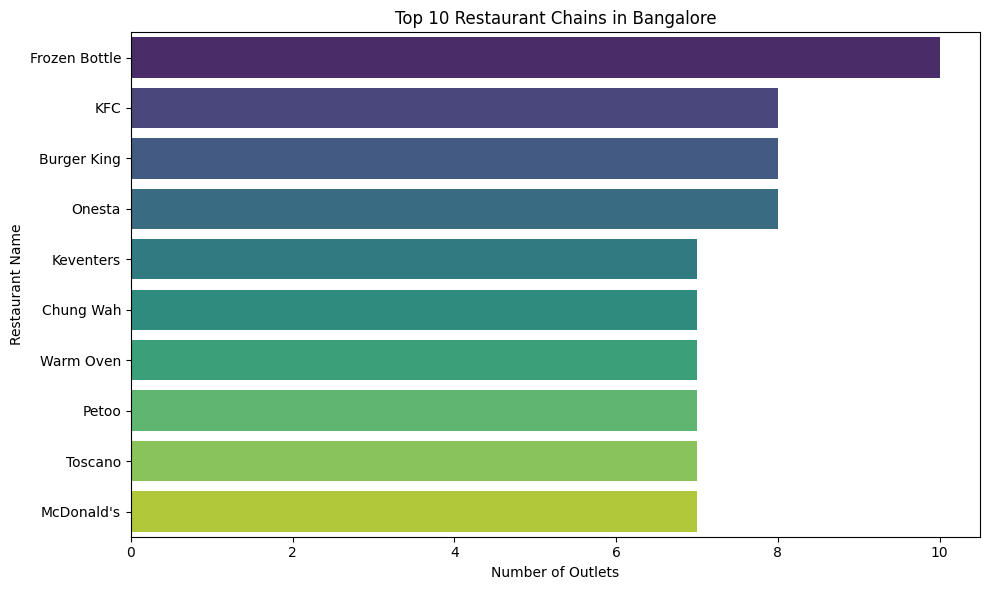

In [19]:
#Most Famous Restaurant Chains
# Count the number of times each restaurant name appears
restaurant_counts = df['name'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x=restaurant_counts.values, y=restaurant_counts.index, palette='viridis')
plt.title('Top 10 Restaurant Chains in Bangalore')
plt.xlabel('Number of Outlets')
plt.ylabel('Restaurant Name')
plt.tight_layout()
plt.show()

C:\Users\HARSHIT\AppData\Local\Temp\ipykernel_14756\3383564166.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=online_delivery_counts.index, y=online_delivery_counts.values, palette='Set2')


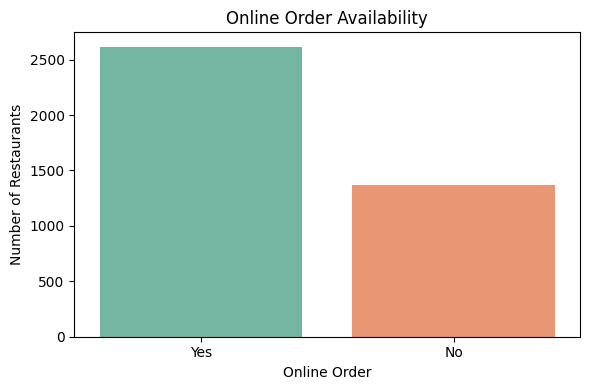

In [20]:
#How Many Restaurants Deliver Online?
# Count of restaurants based on online delivery availability
online_delivery_counts = df['online_order'].value_counts()

# Plotting
plt.figure(figsize=(6,4))
sns.barplot(x=online_delivery_counts.index, y=online_delivery_counts.values, palette='Set2')
plt.title('Online Order Availability')
plt.xlabel('Online Order')
plt.ylabel('Number of Restaurants')
plt.tight_layout()
plt.show()

C:\Users\HARSHIT\AppData\Local\Temp\ipykernel_14756\944977341.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=table_booking_counts.index, y=table_booking_counts.values, palette='pastel')


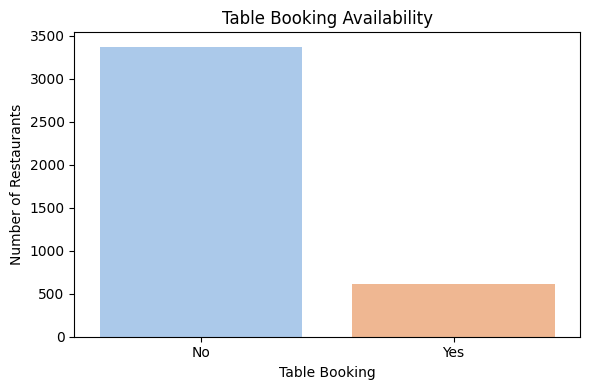

In [21]:
#How Many Restaurants Offer Table Booking?
# Count of restaurants based on table booking availability
table_booking_counts = df['book_table'].value_counts()

# Plotting
plt.figure(figsize=(6,4))
sns.barplot(x=table_booking_counts.index, y=table_booking_counts.values, palette='pastel')
plt.title('Table Booking Availability')
plt.xlabel('Table Booking')
plt.ylabel('Number of Restaurants')
plt.tight_layout()
plt.show()

C:\Users\HARSHIT\AppData\Local\Temp\ipykernel_14756\791638272.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=restaurant_type_counts.index, x=restaurant_type_counts.values, palette='Spectral')


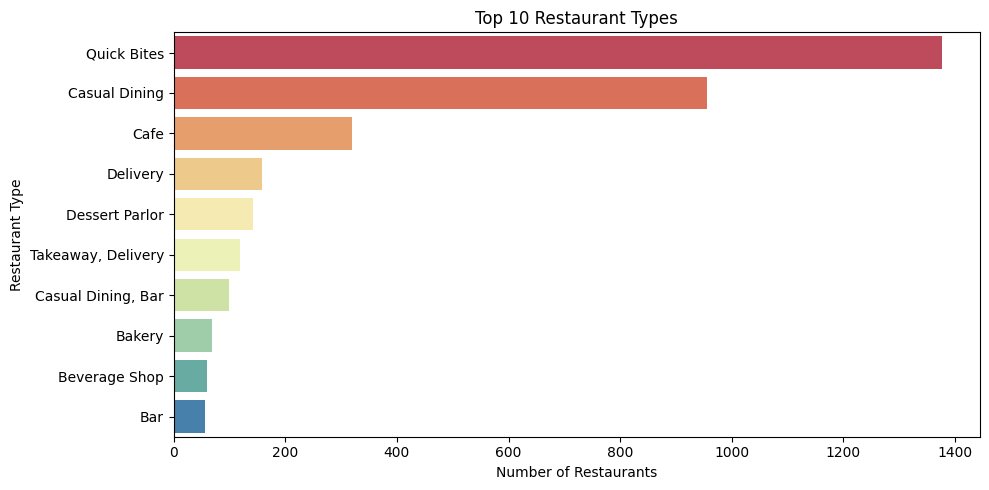

In [22]:
#What Are the Most Common Restaurant Types?
# Count of restaurant types
restaurant_type_counts = df['rest_type'].value_counts().head(10)  # Top 10

# Plotting
plt.figure(figsize=(10,5))
sns.barplot(y=restaurant_type_counts.index, x=restaurant_type_counts.values, palette='Spectral')
plt.title('Top 10 Restaurant Types')
plt.xlabel('Number of Restaurants')
plt.ylabel('Restaurant Type')
plt.tight_layout()
plt.show()

C:\Users\HARSHIT\AppData\Local\Temp\ipykernel_14756\2992674364.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=online_order_counts.index, y=online_order_counts.values, palette='coolwarm')


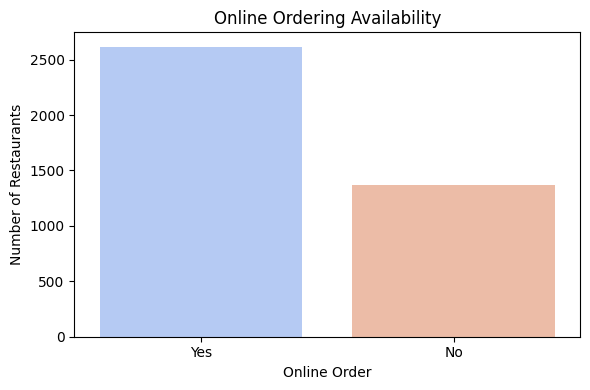

In [23]:
#How Many Restaurants Are Listed Online (On Zomato)?
# Count of restaurants with and without online ordering
online_order_counts = df['online_order'].value_counts()

# Plotting
plt.figure(figsize=(6,4))
sns.barplot(x=online_order_counts.index, y=online_order_counts.values, palette='coolwarm')
plt.title('Online Ordering Availability')
plt.xlabel('Online Order')
plt.ylabel('Number of Restaurants')
plt.tight_layout()
plt.show()

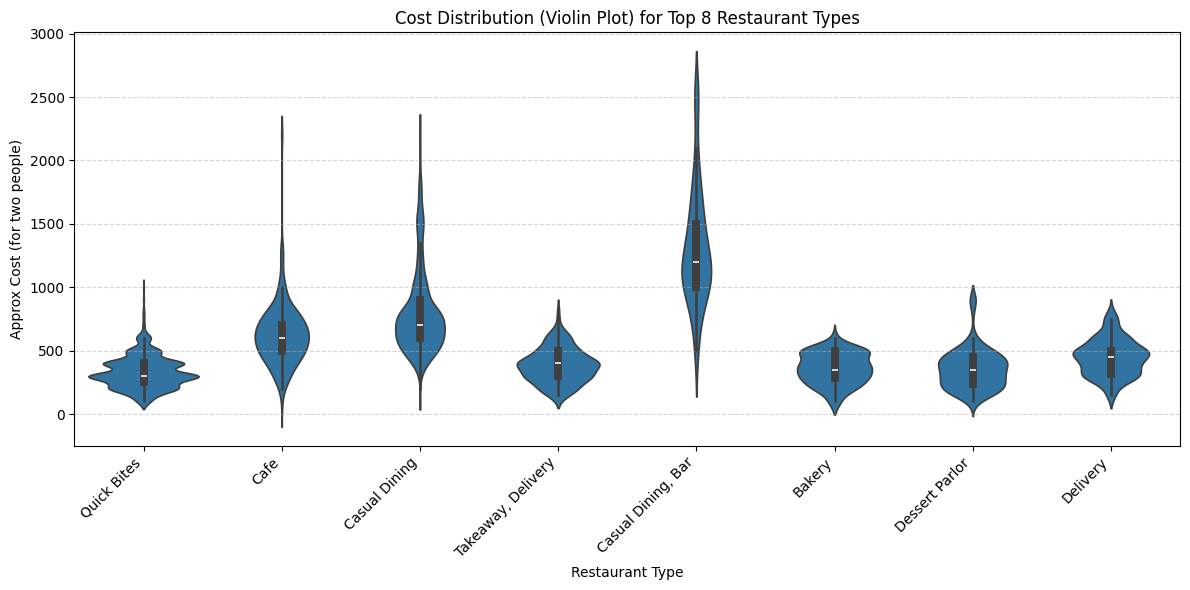

In [24]:
#What is the average cost for two across different restaurant types?
# Filter top 8 restaurant types by count
top_types = df['rest_type'].value_counts().nlargest(8).index
df_top = df[df['rest_type'].isin(top_types)]

plt.figure(figsize=(12,6))
sns.violinplot(x='rest_type', y='approx_cost(for two people)', data=df_top)
plt.xticks(rotation=45, ha='right')
plt.title('Cost Distribution (Violin Plot) for Top 8 Restaurant Types')
plt.ylabel('Approx Cost (for two people)')
plt.xlabel('Restaurant Type')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

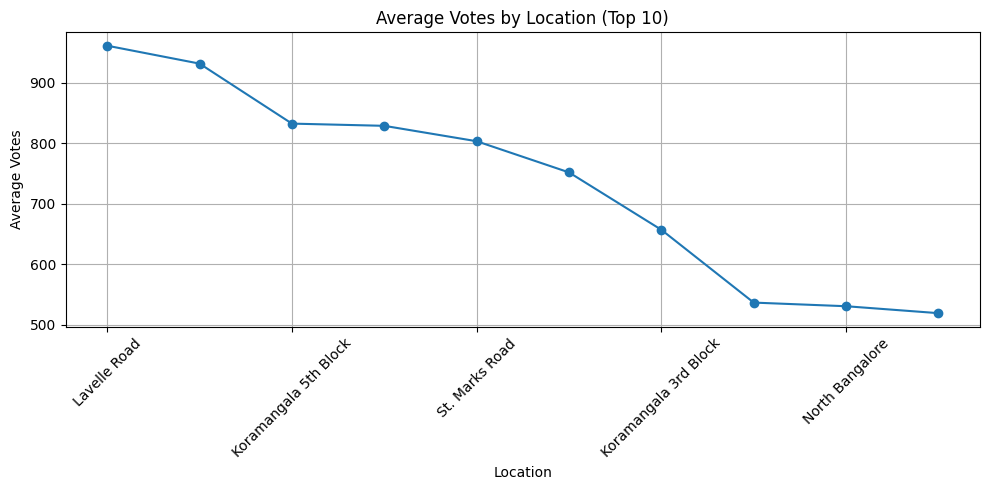

In [25]:
#distribution of votes across top 5 locations
import matplotlib.pyplot as plt

avg_votes = df.groupby('location')['votes'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
avg_votes.plot(kind='line', marker='o')
plt.title('Average Votes by Location (Top 10)')
plt.xlabel('Location')
plt.ylabel('Average Votes')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()